In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_excel(io='Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [10]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

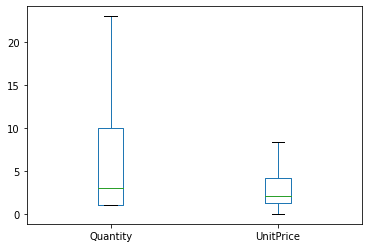

In [10]:
df = df[df['Quantity']>0]
ax = df[['Quantity','UnitPrice']].plot.box(
    showfliers = False
    
)


In [18]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

<AxesSubplot:xlabel='InvoiceDate'>

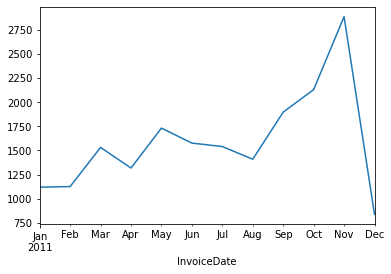

In [22]:
monthly_orders_df[monthly_orders_df.index>'2010-12-31'].plot.line()

In [23]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     638792.680
Freq: M, Name: Sales, dtype: float64

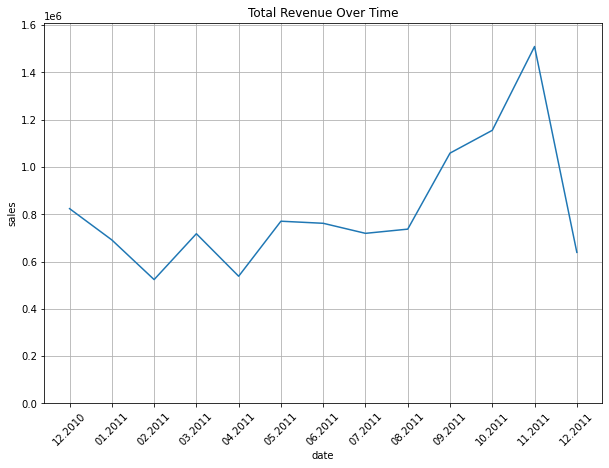

In [24]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
grid=True,
figsize=(10,7),
legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.xticks(
range(len(monthly_revenue_df.index)),
[x.strftime('%m.%Y') for x in monthly_revenue_df.index],
rotation=45
)
plt.show()

In [11]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [13]:
monthly_revenue_df 


InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433668.010
Freq: M, Name: Sales, dtype: float64

<AxesSubplot:xlabel='InvoiceDate'>

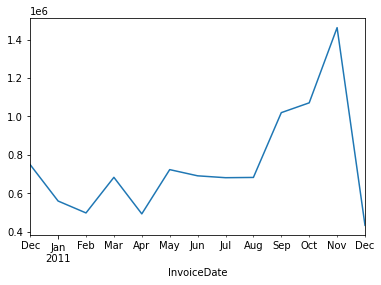

In [14]:
monthly_revenue_df.plot.line(
    
)

In [18]:
invoice_customer_df = df.groupby(
by=['InvoiceNo', 'InvoiceDate']
).agg({
'Sales': sum,
'CustomerID': max,
'Country': max,
}).reset_index()

In [19]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
25938,C581484,2011-12-09 09:27:00,-168469.60,16446.0,United Kingdom
25939,C581490,2011-12-09 09:57:00,-32.53,14397.0,United Kingdom
25940,C581499,2011-12-09 10:28:00,-224.69,15498.0,United Kingdom
25941,C581568,2011-12-09 11:57:00,-54.75,15311.0,United Kingdom


In [20]:
invoice_customer_df.set_index('InvoiceDate')

,InvoiceNo,Sales,CustomerID,Country
InvoiceDate,,,,
2010-12-01 08:26:00,536365,139.12,17850.0,United Kingdom
2010-12-01 08:28:00,536366,22.20,17850.0,United Kingdom
2010-12-01 08:34:00,536367,278.73,13047.0,United Kingdom
2010-12-01 08:34:00,536368,70.05,13047.0,United Kingdom
2010-12-01 08:35:00,536369,17.85,13047.0,United Kingdom
...,...,...,...,...
2011-12-09 09:27:00,C581484,-168469.60,16446.0,United Kingdom
2011-12-09 09:57:00,C581490,-32.53,14397.0,United Kingdom
2011-12-09 10:28:00,C581499,-224.69,15498.0,United Kingdom


In [25]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [46]:
df.groupby([pd.Grouper(key='InvoiceDate',freq='M')])['CustomerID'].nunique()

InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
2011-12-31     686
Freq: M, Name: CustomerID, dtype: int64

In [26]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    357
2011-01-31    256
2011-02-28    246
2011-03-31    323
2011-04-30    271
2011-05-31    398
2011-06-30    333
2011-07-31    327
2011-08-31    299
2011-09-30    400
2011-10-31    446
2011-11-30    674
2011-12-31    150
Freq: M, Name: CustomerID, dtype: int64

In [27]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [28]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     948
2011-01-31     783
2011-02-28     798
2011-03-31    1020
2011-04-30     899
2011-05-31    1079
2011-06-30    1051
2011-07-31     993
2011-08-31     980
2011-09-30    1302
2011-10-31    1425
2011-11-30    1711
2011-12-31     686
Freq: M, Name: CustomerID, dtype: int64

In [29]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0

In [30]:
monthly_repeat_percentage

InvoiceDate
2010-12-31    37.658228
2011-01-31    32.694764
2011-02-28    30.827068
2011-03-31    31.666667
2011-04-30    30.144605
2011-05-31    36.886006
2011-06-30    31.684110
2011-07-31    32.930514
2011-08-31    30.510204
2011-09-30    30.721966
2011-10-31    31.298246
2011-11-30    39.392168
2011-12-31    21.865889
Freq: M, Name: CustomerID, dtype: float64

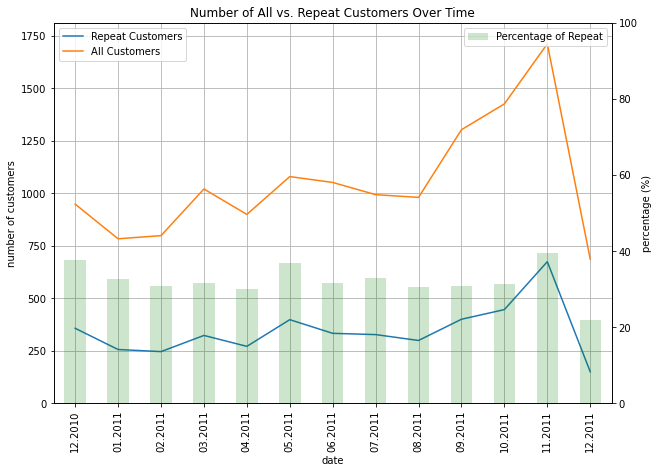

In [31]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
figsize=(10,7)
)
pd.DataFrame(monthly_unique_customers_df.values).plot(
ax=ax,
grid=True
)
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
ax=ax,
grid=True,
secondary_y=True,
color='green',
alpha=0.2
)
ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax2.set_ylabel('percentage (%)')
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])
plt.xticks(
range(len(monthly_repeat_customers_df.index)),
[x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
rotation=45
)
plt.show()

In [32]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

In [33]:
monthly_rev_repeat_customers_df 

InvoiceDate
2010-12-31    382021.39
2011-01-31    263878.59
2011-02-28    223091.71
2011-03-31    326507.60
2011-04-30    218592.06
2011-05-31    404843.47
2011-06-30    374397.20
2011-07-31    346158.02
2011-08-31    347282.63
2011-09-30    554521.59
2011-10-31    580459.31
2011-11-30    745508.69
2011-12-31    167691.74
Freq: M, Name: Sales, dtype: float64

In [34]:
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    51.007118
2011-01-31    47.121155
2011-02-28    44.791897
2011-03-31    47.786233
2011-04-30    44.320540
2011-05-31    55.969130
2011-06-30    54.172287
2011-07-31    50.808449
2011-08-31    50.870447
2011-09-30    54.381516
2011-10-31    54.212831
2011-11-30    51.000890
2011-12-31    38.668229
Freq: M, Name: Sales, dtype: float64

In [54]:
date_item_df = df.groupby([
pd.Grouper(key='InvoiceDate',freq='M'), 'StockCode'
])['Quantity'].sum()

In [55]:
date_item_df.head()

InvoiceDate  StockCode
2010-12-31   10002        251
             10120         16
             10125        154
             10133        130
             10135        411
Name: Quantity, dtype: int64

In [57]:
last_month_sorted_df = date_item_df.loc['2011-11-30']

In [58]:
date_item_df.loc['2011-11-30']

InvoiceDate  StockCode
2011-11-30   10080         113
             10120          49
             10125          62
             10133         -82
             10135         181
                          ... 
             DCGSSGIRL       1
             DOT            47
             M            3659
             POST         1231
             S              -3
Name: Quantity, Length: 2963, dtype: int64

In [82]:
df.loc[df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])].groupby(by = [pd.Grouper(key='InvoiceDate',freq='M'),'StockCode'])['Quantity'].sum()

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

In [83]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

In [1]:
'''
ax = pd.DataFrame(trending_itmes_df.values).plot(
figsize=(10,7),
grid=True,
)
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
#ax.legend(trending_itmes_df.columns, loc='upper left')
plt.xticks(
range(len(trending_itmes_df.index)),
[x.strftime('%m.%Y') for x in trending_itmes_df.index],
rotation=45
)
plt.show()
'''

"\nax = pd.DataFrame(trending_itmes_df.values).plot(\nfigsize=(10,7),\ngrid=True,\n)\nax.set_ylabel('number of purchases')\nax.set_xlabel('date')\nax.set_title('Item Trends over Time')\n#ax.legend(trending_itmes_df.columns, loc='upper left')\nplt.xticks(\nrange(len(trending_itmes_df.index)),\n[x.strftime('%m.%Y') for x in trending_itmes_df.index],\nrotation=45\n)\nplt.show()\n"

In [ ]:
cd /d/"Segmentation Analysis"/